# UFC Unsupervised Machine Learning - Clustering

## List of Contents:
## 01. Importing Libraries
## 02. Importing Data
## 03. Cleaning and Preprocessing Data
## 04. Using the Elbow Technique
## 05. K-means Clustering
## 06. Visualization of Clusters
## 07. Final Thoughts
## 08. Exporting Data

## --

## 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
#Option to display charts without call
%matplotlib inline

In [3]:
#To view all columns of dataset at once
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

## 02. Importing Data

In [4]:
#Defining path for data import
path = r'C:\Users\Mosspants\Desktop\CareerFoundry\A6_Advanced Analytics & Dashboard Design\UFC_Project'

In [5]:
#Importing data
df_ufc = pd.read_csv(os.path.join(path, '02_Data', 'Prepared_Data', 'ufc_opp_avgs_eva.csv'), index_col=False)

In [6]:
#Checking import
df_ufc.head()

,Unnamed: 0,R_fighter,B_fighter,Referee,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Day,Month,Year,Age_group
0,0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,0.420000,0.49500,0.330,0.36000,0.500,1.0000,0.00,0.0,50.0000,20.0000,84.000,45.0000,76.5000,41.000,114.000,64.00,1.500,1.0,9.0,6.500,39.500,11.000,63.0000,27.500,7.5000,7.0000,12.0000,9.0000,3.000,2.000,9.000,8.500,35.0000,12.5,43.5000,17.5000,10.5000,4.5000,4.0000,3.00,4.5000,3.000,36.50,24.50,34.00,277.5000,531.5000,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135,1.000000,0.000000,0.500000,0.460000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.00000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.00000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135,31,27,20,3,2021,Middle
1,1,Trevin Giles,Roman Dolidze,Herb Dean,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,0.660000,0.30500,0.300,0.50000,1.500,0.0000,0.00,0.0,65.5000,35.0000,50.000,16.5000,113.5000,68.500,68.500,29.00,2.500,1.5,0.5,0.500,46.000,20.000,36.0000,7.500,12.0000,8.0000,8.0000,3.0000,7.500,7.000,6.000,6.000,58.0000,30.0,48.0000,15.5000,0.

In [7]:
df_ufc.shape

(5809, 148)

## 03. Cleaning and Preprocessing Data

In [8]:
#Checking for NaN values
df_ufc.isnull().sum()

Unnamed: 0                         0
R_fighter                          0
B_fighter                          0
Referee                           31
location                           0
Winner                             0
title_bout                         0
weight_class                       0
B_avg_KD                        1318
B_avg_opp_KD                    1318
B_avg_SIG_STR_pct               1318
B_avg_opp_SIG_STR_pct           1318
B_avg_TD_pct                    1318
B_avg_opp_TD_pct                1318
B_avg_SUB_ATT                   1318
B_avg_opp_SUB_ATT               1318
B_avg_REV                       1318
B_avg_opp_REV                   1318
B_avg_SIG_STR_att               1318
B_avg_SIG_STR_landed            1318
B_avg_opp_SIG_STR_att           1318
B_avg_opp_SIG_STR_landed        1318
B_avg_TOTAL_STR_att             1318
B_avg_TOTAL_STR_landed          1318
B_avg_opp_TOTAL_STR_att         1318
B_avg_opp_TOTAL_STR_landed      1318
B_avg_TD_att                    1318
B

### Because the linear regression analysis could not use NaN values, I will replace them for the clustering analysis. The missing values are about 1/5th of the entire dataset in some columns, and I think removing them would not be the best in this situation. We can use averages to fill in the missing values. While the missing data is from first fights were no averages would be generated, I think having some number is better than using zeros and skewing the data in that way. I will leave the missing referees, as that is a categorical variable and will not be used in the clustering.

In [9]:
#Finding average values with describe
df_ufc.describe()

,Unnamed: 0,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Day,Month,Year
count,5809.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.0,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.00000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5

In [10]:
#Replacing NaN values with averages
df_ufc['B_avg_KD'].fillna(0.250636, inplace = True)
df_ufc['B_avg_opp_KD'].fillna(0.179462, inplace = True)

df_ufc['B_avg_SIG_STR_pct'].fillna(0.451578, inplace = True)
df_ufc['B_avg_opp_SIG_STR_pct'].fillna(0.434798, inplace = True)

df_ufc['B_avg_TD_pct'].fillna(0.289996, inplace = True)
df_ufc['B_avg_opp_TD_pct'].fillna(0.268604, inplace = True)

df_ufc['B_avg_SUB_ATT'].fillna(0.476535, inplace = True)
df_ufc['B_avg_opp_SUB_ATT'].fillna(0.409844, inplace = True)

In [11]:
#Replacing NaN values with averages
df_ufc['B_avg_REV'].fillna(0.156199, inplace = True)
df_ufc['B_avg_opp_REV'].fillna(0.141816, inplace = True)

df_ufc['B_avg_SIG_STR_att'].fillna(77.500708, inplace = True)
df_ufc['B_avg_SIG_STR_landed'].fillna(33.831589, inplace = True)
df_ufc['B_avg_opp_SIG_STR_att'].fillna(74.318666, inplace = True)
df_ufc['B_avg_opp_SIG_STR_landed'].fillna(31.549357, inplace = True)

df_ufc['B_avg_TOTAL_STR_att'].fillna(98.968166, inplace = True)
df_ufc['B_avg_TOTAL_STR_landed'].fillna(52.877005, inplace = True)
df_ufc['B_avg_opp_TOTAL_STR_att'].fillna(94.008931, inplace = True)
df_ufc['B_avg_opp_TOTAL_STR_landed'].fillna(49.051388, inplace = True)

df_ufc['B_avg_TD_att'].fillna(2.760707, inplace = True)
df_ufc['B_avg_TD_landed'].fillna(1.118433, inplace = True)
df_ufc['B_avg_opp_TD_att'].fillna(2.900280, inplace = True)
df_ufc['B_avg_opp_TD_landed'].fillna(1.086284, inplace = True)

df_ufc['B_avg_HEAD_att'].fillna(60.928881, inplace = True)
df_ufc['B_avg_HEAD_landed'].fillna(21.687375, inplace = True)
df_ufc['B_avg_opp_HEAD_att'].fillna(58.013178, inplace = True)
df_ufc['B_avg_opp_HEAD_landed'].fillna(19.706444, inplace = True)

In [12]:
#Replacing NaN values with averages
df_ufc['B_avg_BODY_att'].fillna(9.855920, inplace = True)
df_ufc['B_avg_BODY_landed'].fillna(6.796187, inplace = True)
df_ufc['B_avg_opp_BODY_att'].fillna(9.531262, inplace = True)
df_ufc['B_avg_opp_BODY_landed'].fillna(6.456664, inplace = True)

df_ufc['B_avg_LEG_att'].fillna(6.715907, inplace = True)
df_ufc['B_avg_LEG_landed'].fillna(5.348028, inplace = True)
df_ufc['B_avg_opp_LEG_att'].fillna(6.774226, inplace = True)
df_ufc['B_avg_opp_LEG_landed'].fillna(5.386250, inplace = True)

df_ufc['B_avg_DISTANCE_att'].fillna(61.155355, inplace = True)
df_ufc['B_avg_DISTANCE_landed'].fillna(22.720011, inplace = True)
df_ufc['B_avg_opp_DISTANCE_att'].fillna(59.662889, inplace = True)
df_ufc['B_avg_opp_DISTANCE_landed'].fillna(21.686106, inplace = True)

df_ufc['B_avg_CLINCH_att'].fillna(8.172219, inplace = True)
df_ufc['B_avg_CLINCH_landed'].fillna(5.590567, inplace = True)
df_ufc['B_avg_opp_CLINCH_att'].fillna(7.571699, inplace = True)
df_ufc['B_avg_opp_CLINCH_landed'].fillna(5.115664, inplace = True)

df_ufc['B_avg_GROUND_att'].fillna(8.173135, inplace = True)
df_ufc['B_avg_GROUND_landed'].fillna(5.521012, inplace = True)
df_ufc['B_avg_opp_GROUND_att'].fillna(7.084078, inplace = True)
df_ufc['B_avg_opp_GROUND_landed'].fillna(4.747587, inplace = True)

df_ufc['B_avg_CTRL_time(seconds)'].fillna(140.086140, inplace = True)
df_ufc['B_avg_opp_CTRL_time(seconds)'].fillna(135.246808, inplace = True)

In [13]:
df_ufc['R_avg_KD'].fillna(0.245780, inplace = True)
df_ufc['R_avg_opp_KD'].fillna(0.191603, inplace = True)

df_ufc['R_avg_SIG_STR_pct'].fillna(0.455355, inplace = True)
df_ufc['R_avg_opp_SIG_STR_pct'].fillna(0.425494, inplace = True)

df_ufc['R_avg_TD_pct'].fillna(0.297829, inplace = True)
df_ufc['R_avg_opp_TD_pct'].fillna(0.254441, inplace = True)

df_ufc['R_avg_SUB_ATT'].fillna(0.461440, inplace = True)
df_ufc['R_avg_opp_SUB_ATT'].fillna(0.392372, inplace = True)

df_ufc['R_avg_REV'].fillna(0.141410, inplace = True)
df_ufc['R_avg_opp_REV'].fillna(0.144421, inplace = True)

df_ufc['R_avg_SIG_STR_att'].fillna(80.874156, inplace = True)
df_ufc['R_avg_SIG_STR_landed'].fillna(35.417459, inplace = True)
df_ufc['R_avg_opp_SIG_STR_att'].fillna(77.631396, inplace = True)
df_ufc['R_avg_opp_SIG_STR_landed'].fillna(32.528213, inplace = True)

df_ufc['R_avg_TOTAL_STR_att'].fillna(102.090566, inplace = True)
df_ufc['R_avg_TOTAL_STR_landed'].fillna(54.265576, inplace = True)
df_ufc['R_avg_opp_TOTAL_STR_att'].fillna(97.078477, inplace = True)
df_ufc['R_avg_opp_TOTAL_STR_landed'].fillna(49.846499, inplace = True)

df_ufc['R_avg_TD_att'].fillna(2.991033, inplace = True)
df_ufc['R_avg_TD_landed'].fillna(1.197390, inplace = True)
df_ufc['R_avg_opp_TD_att'].fillna(2.865482, inplace = True)
df_ufc['R_avg_opp_TD_landed'].fillna(1.031557, inplace = True)

df_ufc['R_avg_HEAD_att'].fillna(63.482439, inplace = True)
df_ufc['R_avg_HEAD_landed'].fillna(22.723542, inplace = True)
df_ufc['R_avg_opp_HEAD_att'].fillna(20.549802, inplace = True)
df_ufc['R_avg_opp_HEAD_landed'].fillna(19.706444, inplace = True)

df_ufc['R_avg_BODY_att'].fillna(10.218859, inplace = True)
df_ufc['R_avg_BODY_landed'].fillna(6.998312, inplace = True)
df_ufc['R_avg_opp_BODY_att'].fillna(9.758476, inplace = True)
df_ufc['R_avg_opp_BODY_landed'].fillna(6.577321, inplace = True)

df_ufc['R_avg_LEG_att'].fillna(7.172857, inplace = True)
df_ufc['R_avg_LEG_landed'].fillna(5.695606, inplace = True)
df_ufc['R_avg_opp_LEG_att'].fillna(6.874189, inplace = True)
df_ufc['R_avg_opp_LEG_landed'].fillna(5.401090, inplace = True)

df_ufc['R_avg_DISTANCE_att'].fillna(64.079010, inplace = True)
df_ufc['R_avg_DISTANCE_landed'].fillna(23.978365, inplace = True)
df_ufc['R_avg_opp_DISTANCE_att'].fillna(63.012689, inplace = True)
df_ufc['R_avg_opp_DISTANCE_landed'].fillna(22.703257, inplace = True)

df_ufc['R_avg_CLINCH_att'].fillna(8.020820, inplace = True)
df_ufc['R_avg_CLINCH_landed'].fillna(5.590567, inplace = True)
df_ufc['R_avg_opp_CLINCH_att'].fillna(7.491858, inplace = True)
df_ufc['R_avg_opp_CLINCH_landed'].fillna(5.311901, inplace = True)

df_ufc['R_avg_GROUND_att'].fillna(8.774325, inplace = True)
df_ufc['R_avg_GROUND_landed'].fillna(5.961522, inplace = True)
df_ufc['R_avg_opp_GROUND_att'].fillna(6.956358, inplace = True)
df_ufc['R_avg_opp_GROUND_landed'].fillna(4.681663, inplace = True)

df_ufc['R_avg_CTRL_time(seconds)'].fillna(147.825089, inplace = True)
df_ufc['R_avg_opp_CTRL_time(seconds)'].fillna(128.194474, inplace = True)

In [14]:
#Checking for NaN values
df_ufc.isnull().sum()

Unnamed: 0                       0
R_fighter                        0
B_fighter                        0
Referee                         31
location                         0
Winner                           0
title_bout                       0
weight_class                     0
B_avg_KD                         0
B_avg_opp_KD                     0
B_avg_SIG_STR_pct                0
B_avg_opp_SIG_STR_pct            0
B_avg_TD_pct                     0
B_avg_opp_TD_pct                 0
B_avg_SUB_ATT                    0
B_avg_opp_SUB_ATT                0
B_avg_REV                        0
B_avg_opp_REV                    0
B_avg_SIG_STR_att                0
B_avg_SIG_STR_landed             0
B_avg_opp_SIG_STR_att            0
B_avg_opp_SIG_STR_landed         0
B_avg_TOTAL_STR_att              0
B_avg_TOTAL_STR_landed           0
B_avg_opp_TOTAL_STR_att          0
B_avg_opp_TOTAL_STR_landed       0
B_avg_TD_att                     0
B_avg_TD_landed                  0
B_avg_opp_TD_att    

In [15]:
#Checking average values with describe
df_ufc.describe()

,Unnamed: 0,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Day,Month,Year
count,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.0,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,

In [16]:
df_ufc.head()

,Unnamed: 0,R_fighter,B_fighter,Referee,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Day,Month,Year,Age_group
0,0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000000,0.000000,0.420000,0.495000,0.330000,0.360000,0.500000,1.000000,0.000000,0.000000,50.000000,20.000000,84.000000,45.000000,76.500000,41.000000,114.000000,64.000000,1.500000,1.000000,9.00000,6.500000,39.500000,11.000000,63.000000,27.500000,7.50000,7.000000,12.000000,9.000000,3.000000,2.000000,9.000000,8.50000,35.000000,12.500000,43.500000,17.500000,10.500000,4.500000,4.000000,3.000000,4.500000,3.000000,36.500000,24.500000,34.00000,277.500000,531.5000,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135,1.000000,0.000000,0.500000,0.460000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,34.000000,17.000000,13.000000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.000000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135,31,27,20,3,2021,Middle
1,1,Trevin Giles,Roman Dolidze,Herb Dean,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500000,0.000000,0.660000,0.305000,0.300000,0.500000,1.500000,0.000000,0.000000,0.000000,65.500000,35.000000,50.0

In [17]:
#Exporting dataframe with filled in values
df_ufc.to_csv(os.path.join(path, '02_Data', 'Prepared_Data', 'ufc_opps_avg_eva_nan.csv'))

In [18]:
#Removing Unnamed: 0 and categorical variables
df_ufc2 = df_ufc.drop(columns = ['Unnamed: 0', 'R_fighter', 'B_fighter', 'Referee', 'location', 'Winner', 'title_bout', 'weight_class', 'B_Stance', 'R_Stance', 'Age_group'])

In [19]:
df_ufc2.head()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Day,Month,Year
0,0.000000,0.000000,0.420000,0.495000,0.330000,0.360000,0.500000,1.000000,0.000000,0.000000,50.000000,20.000000,84.000000,45.000000,76.500000,41.000000,114.000000,64.000000,1.500000,1.000000,9.00000,6.500000,39.500000,11.000000,63.000000,27.500000,7.50000,7.000000,12.000000,9.000000,3.000000,2.000000,9.000000,8.50000,35.000000,12.500000,43.500000,17.500000,10.500000,4.500000,4.000000,3.000000,4.500000,3.000000,36.500000,24.500000,34.00000,277.500000,531.5000,4,0,0,1,1,1,1,0,0,0,0,0,1,0,165.10,170.18,135,1.000000,0.000000,0.500000,0.460000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,34.000000,17.000000,13.000000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.000000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,170.18,177.80,135,31,27,20,3,2021
1,0.500000,0.000000,0.660000,0.305000,0.300000,0.500000,1.500000,0.000000,0.000000,0.000000,65.500000,35.000000,50.000000,16.500000,113.500000,68.500000,68.500000,29.000000,2.500000,1.500000,0.50000,0.500000,46.000000,20.000000,36.000000,7.500000,12.00000,8.000000,8.000000,3.000000,7.500000,7.000000,6.000000,6.00000,58.000000,30.000000,48.000000,15.500000,0.500000,0.500000,0.500000,0.500000,7.000000,4.500000,1.500000,0.500

In [20]:
df_ufc2.shape

(5809, 137)

In [21]:
df_ufc2.dtypes

B_avg_KD                        float64
B_avg_opp_KD                    float64
B_avg_SIG_STR_pct               float64
B_avg_opp_SIG_STR_pct           float64
B_avg_TD_pct                    float64
B_avg_opp_TD_pct                float64
B_avg_SUB_ATT                   float64
B_avg_opp_SUB_ATT               float64
B_avg_REV                       float64
B_avg_opp_REV                   float64
B_avg_SIG_STR_att               float64
B_avg_SIG_STR_landed            float64
B_avg_opp_SIG_STR_att           float64
B_avg_opp_SIG_STR_landed        float64
B_avg_TOTAL_STR_att             float64
B_avg_TOTAL_STR_landed          float64
B_avg_opp_TOTAL_STR_att         float64
B_avg_opp_TOTAL_STR_landed      float64
B_avg_TD_att                    float64
B_avg_TD_landed                 float64
B_avg_opp_TD_att                float64
B_avg_opp_TD_landed             float64
B_avg_HEAD_att                  float64
B_avg_HEAD_landed               float64
B_avg_opp_HEAD_att              float64


In [22]:
#Checking for NaN values
df_ufc2.isnull().sum()

B_avg_KD                        0
B_avg_opp_KD                    0
B_avg_SIG_STR_pct               0
B_avg_opp_SIG_STR_pct           0
B_avg_TD_pct                    0
B_avg_opp_TD_pct                0
B_avg_SUB_ATT                   0
B_avg_opp_SUB_ATT               0
B_avg_REV                       0
B_avg_opp_REV                   0
B_avg_SIG_STR_att               0
B_avg_SIG_STR_landed            0
B_avg_opp_SIG_STR_att           0
B_avg_opp_SIG_STR_landed        0
B_avg_TOTAL_STR_att             0
B_avg_TOTAL_STR_landed          0
B_avg_opp_TOTAL_STR_att         0
B_avg_opp_TOTAL_STR_landed      0
B_avg_TD_att                    0
B_avg_TD_landed                 0
B_avg_opp_TD_att                0
B_avg_opp_TD_landed             0
B_avg_HEAD_att                  0
B_avg_HEAD_landed               0
B_avg_opp_HEAD_att              0
B_avg_opp_HEAD_landed           0
B_avg_BODY_att                  0
B_avg_BODY_landed               0
B_avg_opp_BODY_att              0
B_avg_opp_BODY

## 04. Using the Elbow Technique

In [23]:
#Defining a range of potential clusters
num_cl = range(1, 10)
#Defining k-means clusters to range
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [24]:
#Rate of variation for each cluster
score = [kmeans[i].fit(df_ufc2).score(df_ufc2) for i in range(len(kmeans))]

score

C:\Users\Mosspants\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mosspants\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mosspants\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mosspants\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

[-1240141715.2902195,
 -952750829.9022788,
 -783646372.1590372,
 -710612955.2930031,
 -654666219.5902531,
 -611987525.7003878,
 -579570362.7660496,
 -549634659.9690206,
 -522217297.92122763]

Text(0.5, 1.0, 'Elbow Curve')

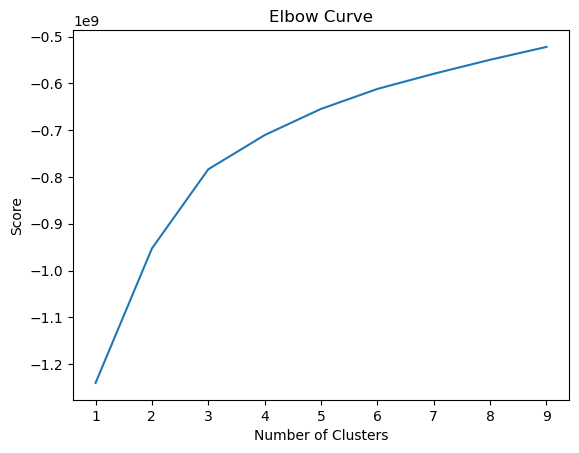

In [25]:
# Plotting scores
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

### Based on the line graph, the slope of the line seems to straighten out between 2 and 3. The curve is also fairly gradual. I will use 3 clusters.

## 05. K-means Clustering

In [26]:
# Creating k-means object with 3 clusters
kmeans = KMeans(n_clusters = 3) 

In [27]:
# Fitting dataframe to k-means object
kmeans.fit(df_ufc2)

C:\Users\Mosspants\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [28]:
#Creating new columns for clusters
df_ufc2['Clusters'] = kmeans.fit_predict(df_ufc2)

C:\Users\Mosspants\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
#Checking new column in dataframe
df_ufc2.head()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Day,Month,Year,Clusters
0,0.000000,0.000000,0.420000,0.495000,0.330000,0.360000,0.500000,1.000000,0.000000,0.000000,50.000000,20.000000,84.000000,45.000000,76.500000,41.000000,114.000000,64.000000,1.500000,1.000000,9.00000,6.500000,39.500000,11.000000,63.000000,27.500000,7.50000,7.000000,12.000000,9.000000,3.000000,2.000000,9.000000,8.50000,35.000000,12.500000,43.500000,17.500000,10.500000,4.500000,4.000000,3.000000,4.500000,3.000000,36.500000,24.500000,34.00000,277.500000,531.5000,4,0,0,1,1,1,1,0,0,0,0,0,1,0,165.10,170.18,135,1.000000,0.000000,0.500000,0.460000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,34.000000,17.000000,13.000000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.000000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,170.18,177.80,135,31,27,20,3,2021,1
1,0.500000,0.000000,0.660000,0.305000,0.300000,0.500000,1.500000,0.000000,0.000000,0.000000,65.500000,35.000000,50.000000,16.500000,113.500000,68.500000,68.500000,29.000000,2.500000,1.500000,0.50000,0.500000,46.000000,20.000000,36.000000,7.500000,12.00000,8.000000,8.000000,3.000000,7.500000,7.000000,6.000000,6.00000,58.000000,30.000000,48.000000,15.500000,0.500000,0.500000,0.500000,0.500000,7.000000,4.500000,1.5

In [30]:
#Count of Clusters column
df_ufc2['Clusters'].value_counts()

Clusters
0    2951
1    1621
2    1237
Name: count, dtype: int64

## 06. Visualization of Clusters

Text(0, 0.5, 'Blue Wins')

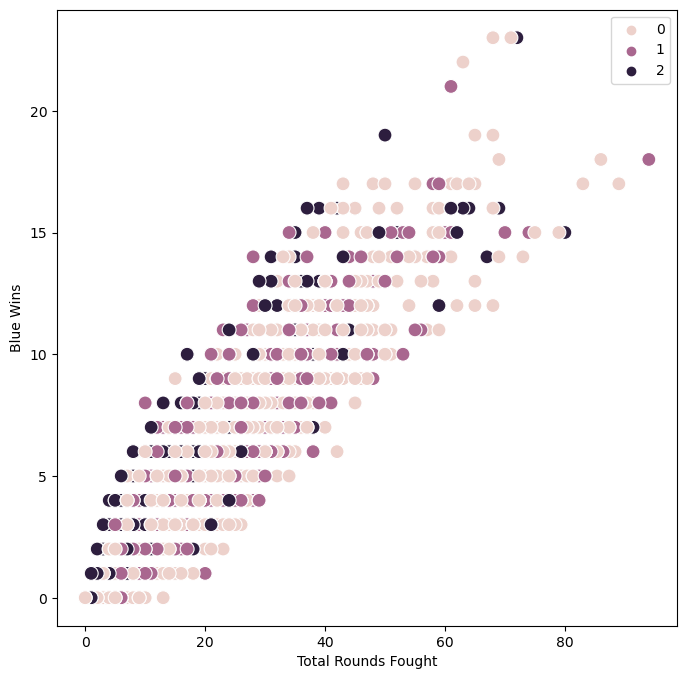

In [31]:
#Scatterplot of Blue wins and Blue total rounds fought
plt.figure(figsize = (8,8))
ax = sns.scatterplot(x = df_ufc2['B_total_rounds_fought'], y = df_ufc2['B_wins'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Total Rounds Fought')
plt.ylabel('Blue Wins')

Text(0, 0.5, 'Red Wins')

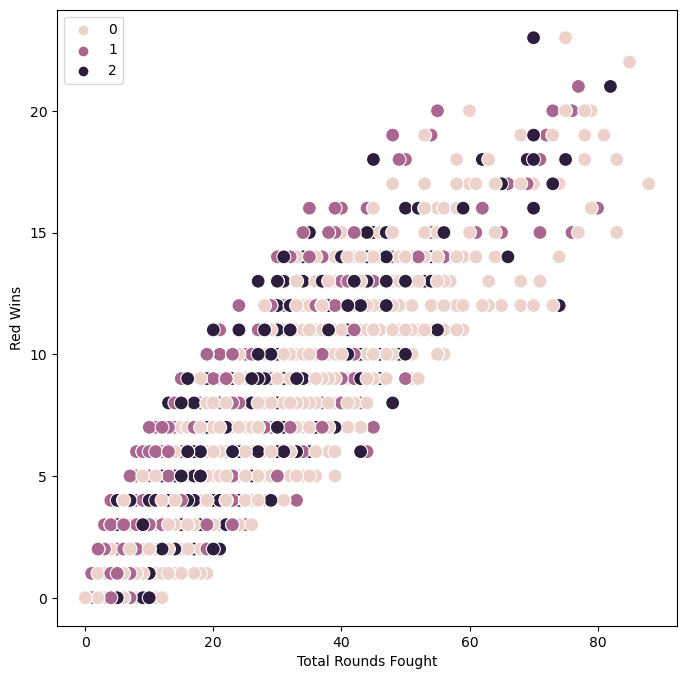

In [32]:
#Scatterplot of Red wins and Red total rounds fought
plt.figure(figsize = (8,8))
ax = sns.scatterplot(x = df_ufc2['R_total_rounds_fought'], y = df_ufc2['R_wins'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Total Rounds Fought')
plt.ylabel('Red Wins')

### In these graphs, the points seem to follow the previous scatterplots made of wins and total rounds fought. There is something linking the clusters together, but it is not wins.

In [33]:
#Sorting data into the clusters
df_ufc2.loc[df_ufc2['Clusters'] == 2, 'Cluster'] = 'Dark purple'
df_ufc2.loc[df_ufc2['Clusters'] == 1, 'Cluster'] = 'Purple'
df_ufc2.loc[df_ufc2['Clusters'] == 0, 'Cluster'] = 'Pink'

In [34]:
df_ufc2.head()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Day,Month,Year,Clusters,Cluster
0,0.000000,0.000000,0.420000,0.495000,0.330000,0.360000,0.500000,1.000000,0.000000,0.000000,50.000000,20.000000,84.000000,45.000000,76.500000,41.000000,114.000000,64.000000,1.500000,1.000000,9.00000,6.500000,39.500000,11.000000,63.000000,27.500000,7.50000,7.000000,12.000000,9.000000,3.000000,2.000000,9.000000,8.50000,35.000000,12.500000,43.500000,17.500000,10.500000,4.500000,4.000000,3.000000,4.500000,3.000000,36.500000,24.500000,34.00000,277.500000,531.5000,4,0,0,1,1,1,1,0,0,0,0,0,1,0,165.10,170.18,135,1.000000,0.000000,0.500000,0.460000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,34.000000,17.000000,13.000000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.000000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,170.18,177.80,135,31,27,20,3,2021,1,Purple
1,0.500000,0.000000,0.660000,0.305000,0.300000,0.500000,1.500000,0.000000,0.000000,0.000000,65.500000,35.000000,50.000000,16.500000,113.500000,68.500000,68.500000,29.000000,2.500000,1.500000,0.50000,0.500000,46.000000,20.000000,36.000000,7.500000,12.00000,8.000000,8.000000,3.000000,7.500000,7.000000,6.000000,6.00000,58.000000,30.000000,48.000000,15.500000,0.500000,0.500000,0.500000,0.500000,7.0000

In [35]:
#Mean and median of data by cluster for B and R wins and total rounds fought
df_ufc2.groupby('Cluster').agg({'B_wins':['mean', 'median'], 'B_total_rounds_fought':['mean', 'median'], 'R_wins':['mean', 'median'],'R_total_rounds_fought':['mean', 'median']})

B_wins        B_total_rounds_fought           R_wins         \
                 mean median                  mean median      mean median   
Cluster                                                                      
Dark purple  2.877930    2.0              8.577203    5.0  4.116411    3.0   
Pink         2.630295    1.0             10.208404    6.0  3.773636    3.0   
Purple       2.472548    1.0              9.681061    6.0  3.737816    3.0   

            R_total_rounds_fought         
                             mean median  
Cluster                                   
Dark purple             14.645109   10.0  
Pink                    15.031515   10.0  
Purple                  11.867366    7.0

### Looking at the individual statistics, Purple has the most Blue wins and least number of rounds fought. It has the most number of Red wins, but the second lowest number of rounds fought. It would be ideal to win more in fewer rounds, but there doesn't seem to be a clear cut group of fighters that achieve this.

Text(0, 0.5, 'Total Rounds Fought')

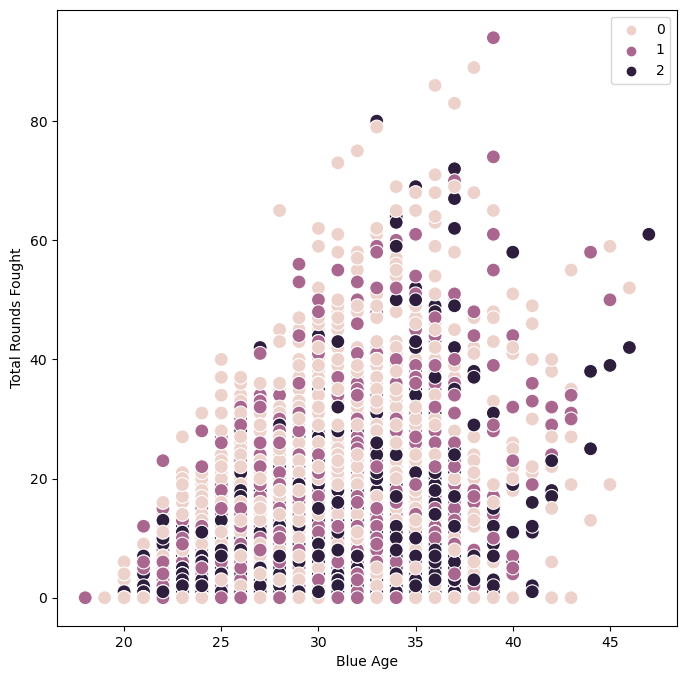

In [36]:
#Scatterplot of Blue age and Blue total rounds fought
plt.figure(figsize = (8,8))
ax = sns.scatterplot(x = df_ufc2['B_age'], y = df_ufc2['B_total_rounds_fought'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Blue Age')
plt.ylabel('Total Rounds Fought')

In [37]:
#Mean and median of data by cluster for B and R wins and total rounds fought
df_ufc2.groupby('Cluster').agg({'B_age':['mean', 'median'], 'B_total_rounds_fought':['mean', 'median']})

B_age        B_total_rounds_fought       
                  mean median                  mean median
Cluster                                                   
Dark purple  29.597413   29.0              8.577203    5.0
Pink         29.133514   29.0             10.208404    6.0
Purple       29.373226   29.0              9.681061    6.0

### I was wondering if there may have been a relationship between the age of a fighter and the number of rounds they are in. The averages of the ages are similar among all clusters, but the Pink cluster has a slightly lower average age and higher total rounds fought. Instead of older fighters having more rounds and longer careers, it seems that younger fighters may have more rounds. Or, age is not a factor in the amount of rounds or length of career. This would make sense as UFC is physically demanding, and even a surprise injury could end a career.

Text(0, 0.5, 'Total Rounds Fought')

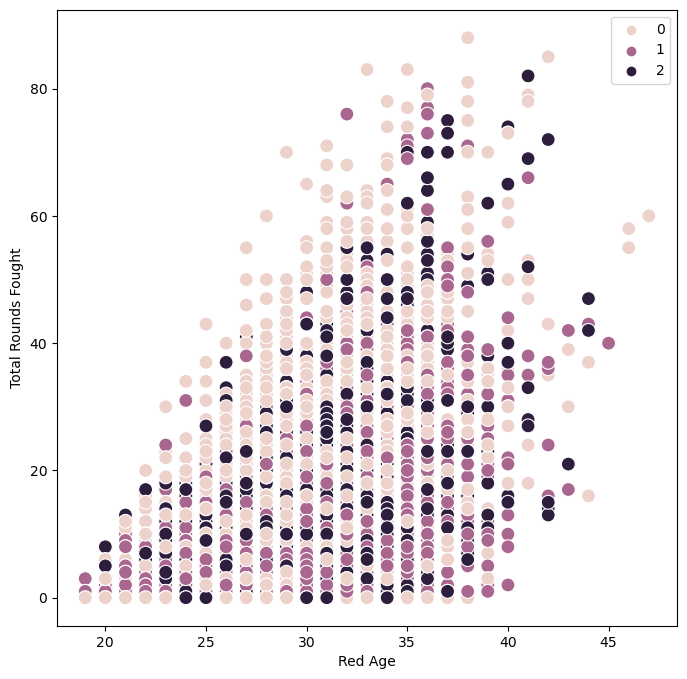

In [38]:
#Scatterplot of Red age and Red total rounds fought
plt.figure(figsize = (8,8))
ax = sns.scatterplot(x = df_ufc2['R_age'], y = df_ufc2['R_total_rounds_fought'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Red Age')
plt.ylabel('Total Rounds Fought')

In [39]:
#Mean and median of data by cluster for B and R wins and total rounds fought
df_ufc2.groupby('Cluster').agg({'R_age':['mean', 'median'], 'R_total_rounds_fought':['mean', 'median']})

R_age        R_total_rounds_fought       
                  mean median                  mean median
Cluster                                                   
Dark purple  29.838319   30.0             14.645109   10.0
Pink         29.444595   29.0             15.031515   10.0
Purple       29.786552   30.0             11.867366    7.0

### The statistics of Red age and rounds fought are also similar to Blue age and rounds fought.

Text(0, 0.5, 'Blue wins by Doctor Stoppage')

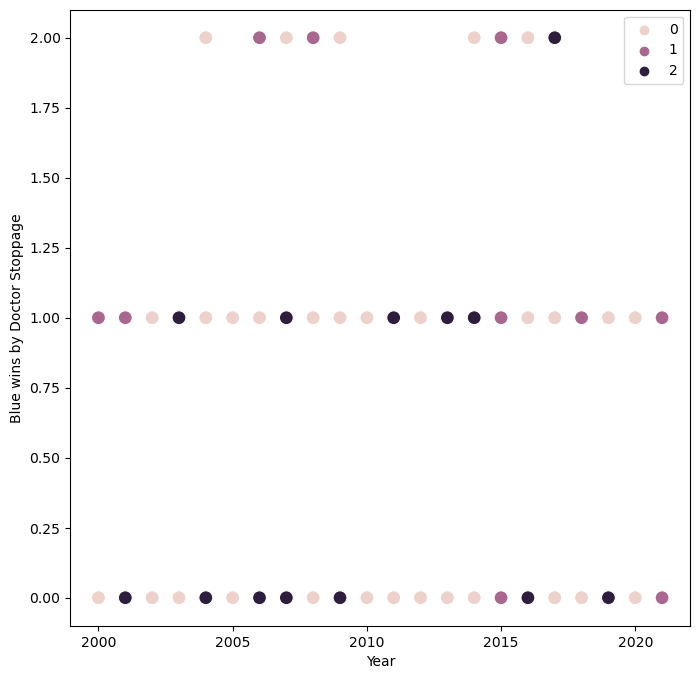

In [40]:
#Scatterplot of Blue wins by TKO Doctor Stoppage and year
plt.figure(figsize = (8,8))
ax = sns.scatterplot(x = df_ufc2['Year'], y = df_ufc2['B_win_by_TKO_Doctor_Stoppage'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Year')
plt.ylabel('Blue wins by Doctor Stoppage')

Text(0, 0.5, 'Red wins by Doctor Stoppage')

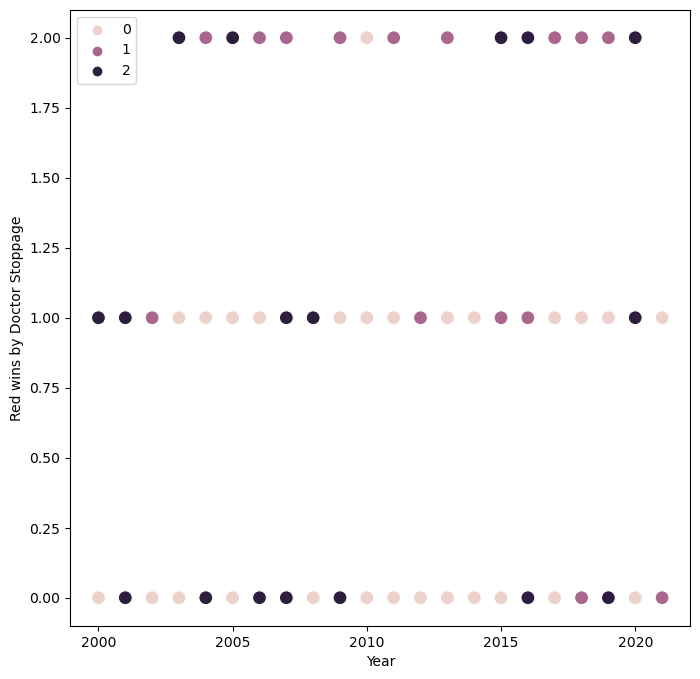

In [41]:
#Scatterplot of Red wins by TKO Doctor Stoppage and year
plt.figure(figsize = (8,8))
ax = sns.scatterplot(x = df_ufc2['Year'], y = df_ufc2['R_win_by_TKO_Doctor_Stoppage'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Year')
plt.ylabel('Red wins by Doctor Stoppage')

In [42]:
#Mean and median of data by cluster for Doctor stoppage and year
df_ufc2.groupby('Cluster').agg({'B_win_by_TKO_Doctor_Stoppage':['mean', 'median'], 'R_win_by_TKO_Doctor_Stoppage':['mean', 'median'], 'Year' : ['mean', 'median']})

B_win_by_TKO_Doctor_Stoppage        R_win_by_TKO_Doctor_Stoppage  \
                                    mean median                         mean   
Cluster                                                                        
Dark purple                     0.046888    0.0                     0.076799   
Pink                            0.041681    0.0                     0.057269   
Purple                          0.040099    0.0                     0.085750   

                           Year          
            median         mean  median  
Cluster                                  
Dark purple    0.0  2013.192401  2014.0  
Pink           0.0  2014.468655  2015.0  
Purple         0.0  2013.647748  2014.0

### I was interested in seeing if the amount of total knockouts by doctor stoppage had decreased over the years, perhaps if regulations grew tighter. Time may not be the appropriate variable to use with a cluster analysis though, as it does not seem to be clustering this variable by year. On the whole, doctor stoppages appear to be low in the clusters.

In [43]:
#Count of doctor stoppage, knockout, and submission wins by year
df_ufc2.groupby('Year').agg({'B_win_by_TKO_Doctor_Stoppage' : ['sum'], 'R_win_by_TKO_Doctor_Stoppage' : ['sum'], 'B_win_by_KO/TKO' : ['sum'], 'R_win_by_KO/TKO' : ['sum'], 'B_win_by_Submission' : ['sum'], 'R_win_by_Submission' : ['sum']})

,B_win_by_TKO_Doctor_Stoppage,R_win_by_TKO_Doctor_Stoppage,B_win_by_KO/TKO,R_win_by_KO/TKO,B_win_by_Submission,R_win_by_Submission
,sum,sum,sum,sum,sum,sum
Year,,,,,,
2000,3,6,15,17,7,9
2001,1,7,24,35,22,12
2002,1,8,35,53,23,15
2003,4,6,58,55,13,14
2004,5,9,39,49,12,28
2005,6,13,48,80,35,33
2006,17,24,92,147,84,79
2007,11,17,112,145,71,98


In [44]:
#Count of fights per year
df_ufc2['Year'].value_counts(dropna = False).sort_index()

Year
2000     43
2001     40
2002     53
2003     41
2004     39
2005     80
2006    158
2007    171
2008    201
2009    215
2010    253
2011    300
2012    341
2013    386
2014    503
2015    473
2016    493
2017    457
2018    474
2019    516
2020    456
2021    116
Name: count, dtype: int64

### To check the doctor stoppages, I grouped them by year and did the same for knockout and submission wins by comparison. This might be a better way to look at win types as we can see how rare doctor stoppages are, although they did seem to increase after 2006 especially on the Red corner. This is partly because the number of fights per year increased.

### The UFC adopted the Unified Rules of MMA in 2000, before the increase of doctor stoppages.

### We also only have data till March of 2021 but there's already 116 fights and 10 doctor stoppages. That's compared to 43 fights and 9 doctor stoppages in 2000.

## 07. Final Thoughts

### I think these results are useful in a sense that it further illustrates how hard it is to predict something based on human performance. Age, rounds fought, reach, etc. are not indicators of if a person will win a match. 
### When looking at these results, I would say that a fighter's career is short and your performance or number of rounds fought is not based on your age when you started. While there is an increase of young fighters, it doesn't necessarily give them an advantage. It also doesn't mean that they have less experience. It is better to win more fights in less rounds, but that is not always the outcome that will happen. 
### This makes the sport exciting for fans, as there is always the chance for their favorite fighter to win. 

## 08. Exporting Data

In [45]:
#Checking shape and output of data
df_ufc2.shape

(5809, 139)

In [46]:
df_ufc2.head()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Day,Month,Year,Clusters,Cluster
0,0.000000,0.000000,0.420000,0.495000,0.330000,0.360000,0.500000,1.000000,0.000000,0.000000,50.000000,20.000000,84.000000,45.000000,76.500000,41.000000,114.000000,64.000000,1.500000,1.000000,9.00000,6.500000,39.500000,11.000000,63.000000,27.500000,7.50000,7.000000,12.000000,9.000000,3.000000,2.000000,9.000000,8.50000,35.000000,12.500000,43.500000,17.500000,10.500000,4.500000,4.000000,3.000000,4.500000,3.000000,36.500000,24.500000,34.00000,277.500000,531.5000,4,0,0,1,1,1,1,0,0,0,0,0,1,0,165.10,170.18,135,1.000000,0.000000,0.500000,0.460000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,34.000000,17.000000,13.000000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.000000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,170.18,177.80,135,31,27,20,3,2021,1,Purple
1,0.500000,0.000000,0.660000,0.305000,0.300000,0.500000,1.500000,0.000000,0.000000,0.000000,65.500000,35.000000,50.000000,16.500000,113.500000,68.500000,68.500000,29.000000,2.500000,1.500000,0.50000,0.500000,46.000000,20.000000,36.000000,7.500000,12.00000,8.000000,8.000000,3.000000,7.500000,7.000000,6.000000,6.00000,58.000000,30.000000,48.000000,15.500000,0.500000,0.500000,0.500000,0.500000,7.0000

In [47]:
#Exporting dataframe with cluster
df_ufc2.to_csv(os.path.join(path, '02_Data', 'Prepared_Data', 'ufc_opps_cluster.csv'))